# Student performance prediction

Informasi Dataset:

Link: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

Target

 average_score = math score + reading score + writing score / 3 (Feature Engineering)

###Data Understanding

**Data Loading**

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import shutil
import os

Download Dataset dari Kaggle

In [2]:
path = kagglehub.dataset_download("rkiattisak/student-performance-in-mathematics")
print("Path to dataset files:", path)
print("Files in dataset folder:")
print(os.listdir(path))

destination_path = "/content"
for file_name in os.listdir(path):
    full_file_name = os.path.join(path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, destination_path)

print("✅ Dataset berhasil disalin ke /content")
print("Isi folder /content:")
print(os.listdir("/content"))

100%|██████████| 8.66k/8.66k [00:00<00:00, 10.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rkiattisak/student-performance-in-mathematics/versions/3
Files in dataset folder:
['exams.csv']
✅ Dataset berhasil disalin ke /content
Isi folder /content:
['.config', 'kaggle.json', 'exams.csv', 'sample_data']


Load Data

In [3]:
df = pd.read_csv('/content/exams.csv')

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


###Exploratory Data Analysis

Menampilkan Informasi Setiap Variabel

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Mengecek Deskripsi statistik data

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [7]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


**Exploratory Data Analysis - Missing Value dan Outliers**

Memeriksa Missing Vallue

In [8]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
df.shape

(1000, 8)

Memeriksa Outliers

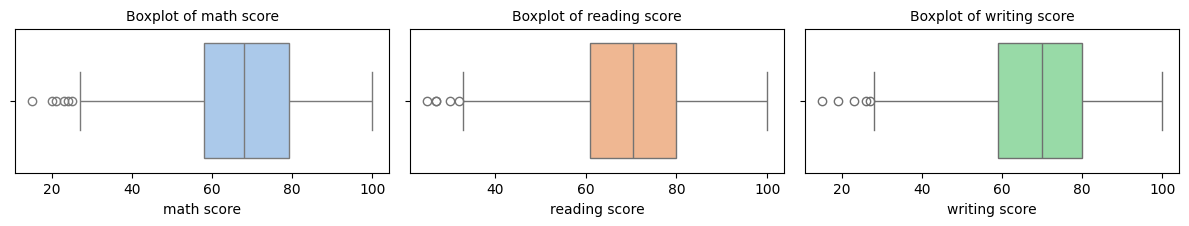

In [10]:
pastel_colors = sns.color_palette("pastel", 12)
plt.figure(figsize=(12, 8))
cols = [
'math score','reading score','writing score'
]

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col], color=pastel_colors[i])
    plt.title(f'Boxplot of {col}', fontsize=10)

plt.tight_layout()
plt.show()


**Exploratory Data Analysis - Univariate Analysis (Categorical)**

In [11]:
numerical_features = ['math score','reading score','writing score']
categorical_features = [
'gender',
'race/ethnicity',
'parental level of education',
'lunch',
'test preparation course',
]


Fitur Gender

        count  percent
gender                
male      508     50.8
female    492     49.2


<Axes: title={'center': 'gender'}, xlabel='gender'>

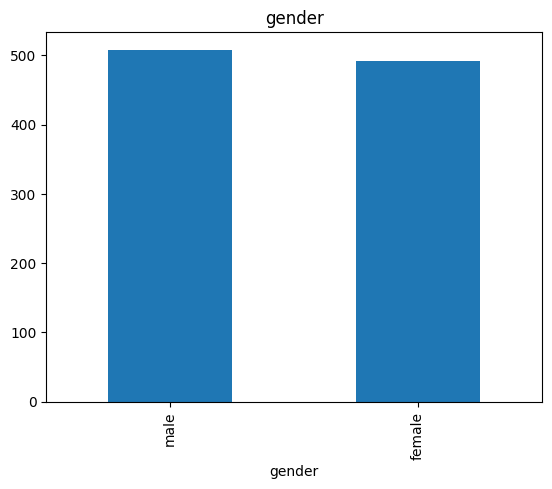

In [12]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count':count, 'percent':percent})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur ras

                count  percent
race/ethnicity                
group C           323     32.3
group D           257     25.7
group B           198     19.8
group E           143     14.3
group A            79      7.9


<Axes: title={'center': 'race/ethnicity'}, xlabel='race/ethnicity'>

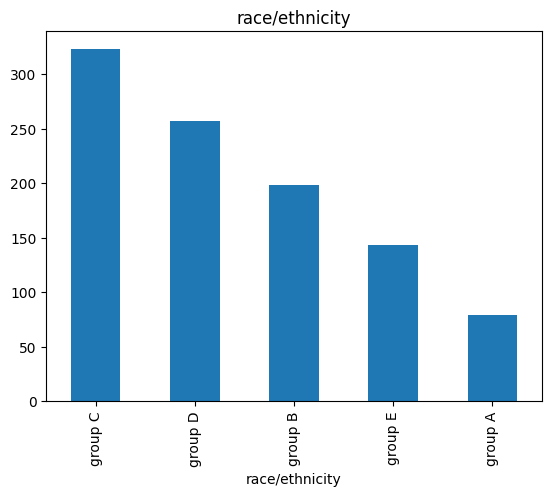

In [13]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count':count, 'percent':percent})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur Level pendidikan orangtua

                             count  percent
parental level of education                
some college                   224     22.4
high school                    215     21.5
associate's degree             204     20.4
some high school               177     17.7
bachelor's degree              105     10.5
master's degree                 75      7.5


<Axes: title={'center': 'parental level of education'}, xlabel='parental level of education'>

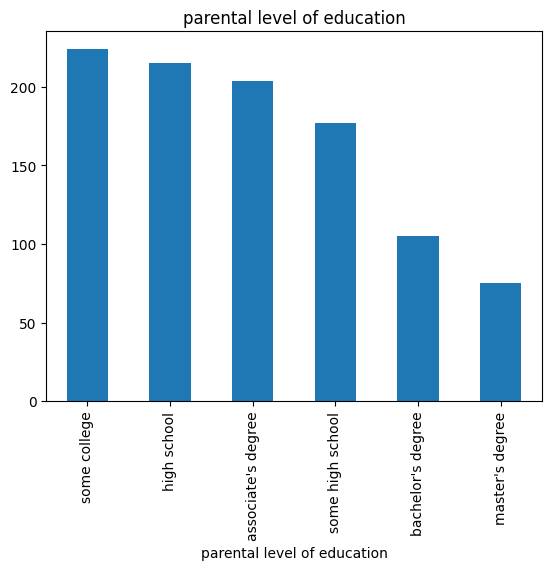

In [14]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count':count, 'percent':percent})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur Jenis makan siang

              count  percent
lunch                       
standard        660     66.0
free/reduced    340     34.0


<Axes: title={'center': 'lunch'}, xlabel='lunch'>

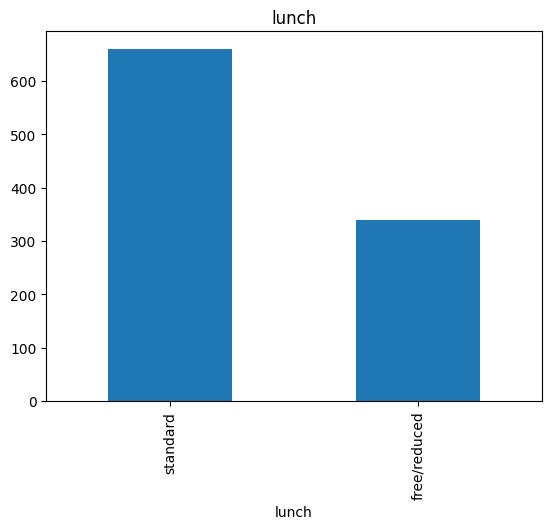

In [15]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count':count, 'percent':percent})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur Jenis persiapan tes

                         count  percent
test preparation course                
none                       656     65.6
completed                  344     34.4


<Axes: title={'center': 'test preparation course'}, xlabel='test preparation course'>

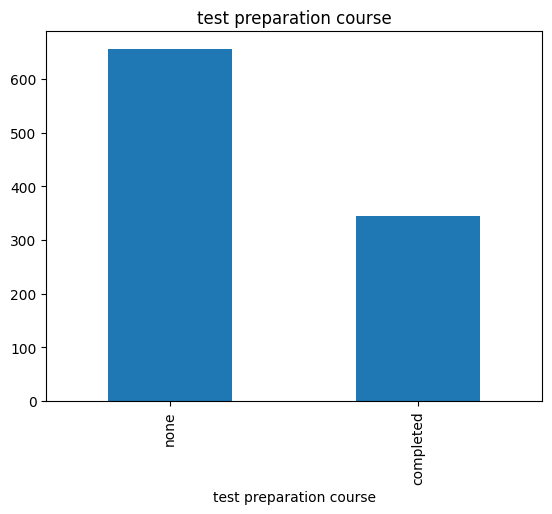

In [16]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count':count, 'percent':percent})
print(count_percent)
count.plot(kind='bar', title=feature)

**Exploratory Data Analysis - Univariate Analysis (Numerical)**

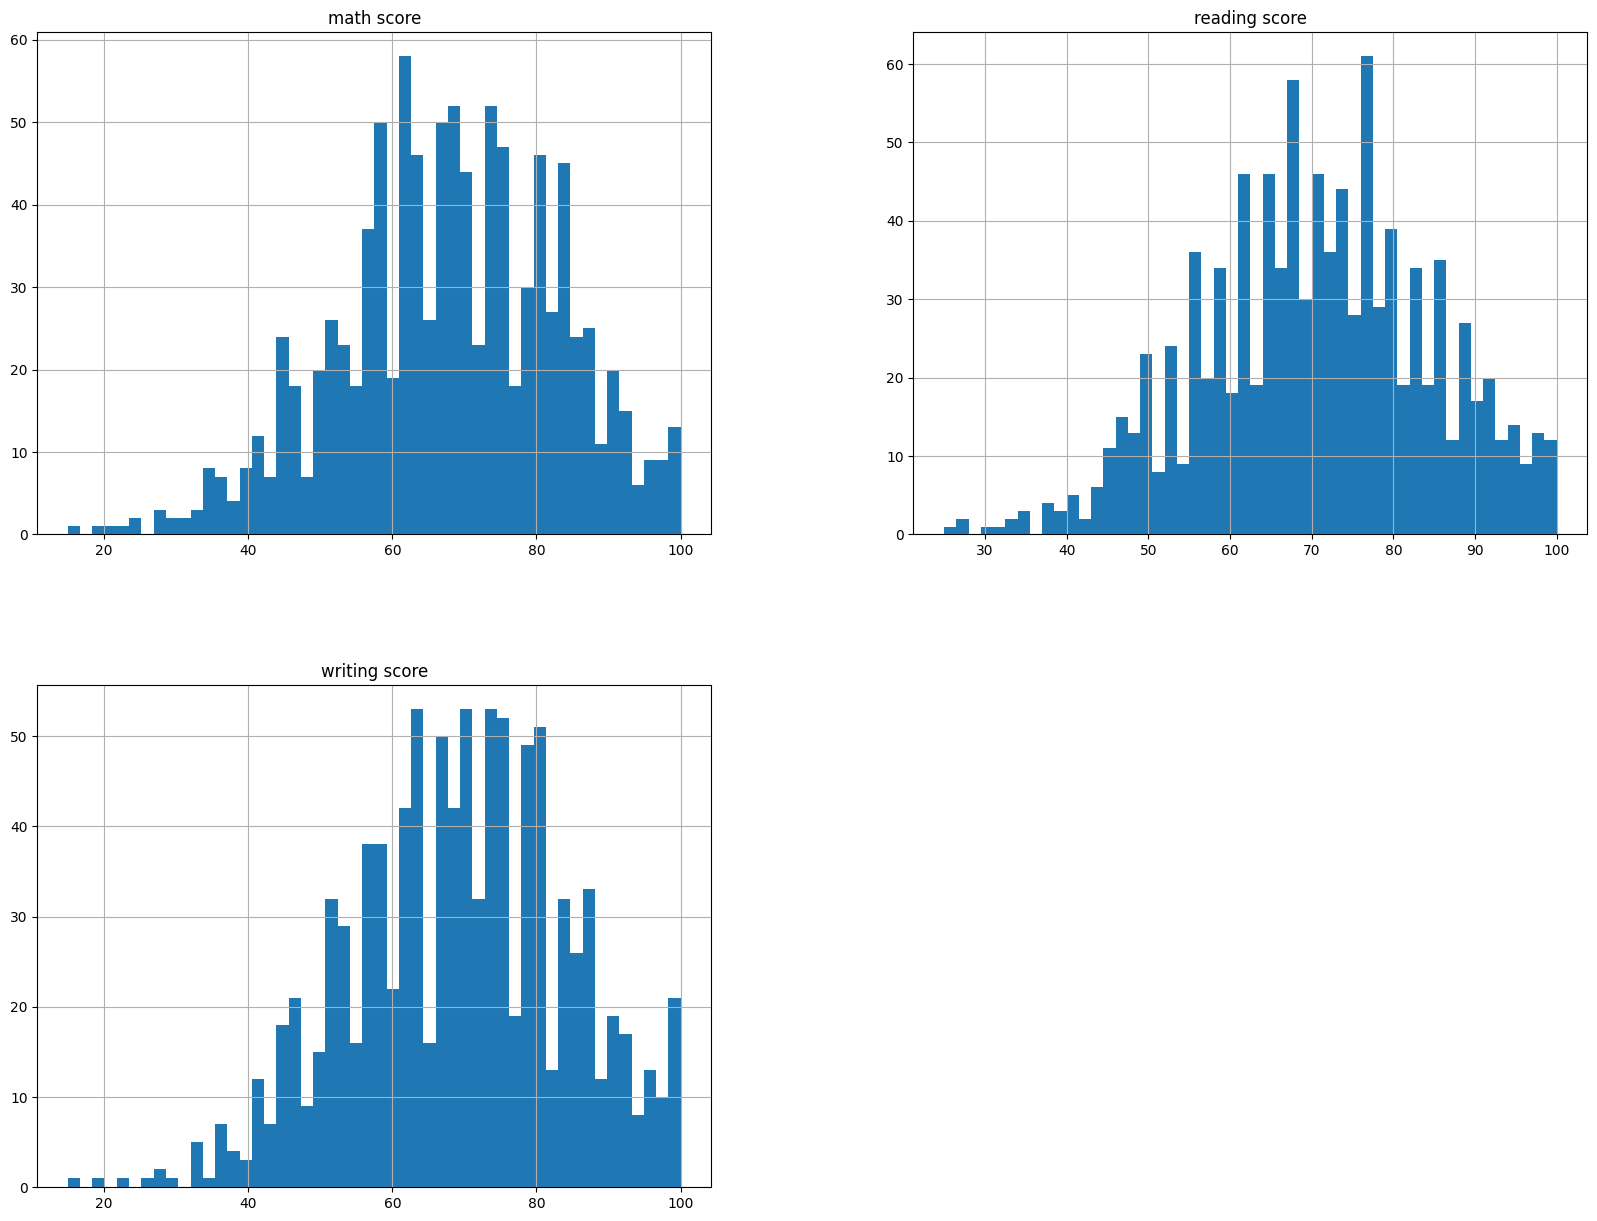

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Exploratory Data Analysis - Multivariate Analysis (Categorical terhadap target)**

Membuat Target

In [18]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

Visualisasi

<ipython-input-19-3f78d6cf0718>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="average_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-19-3f78d6cf0718>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="average_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-19-3f78d6cf0718>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="average_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<

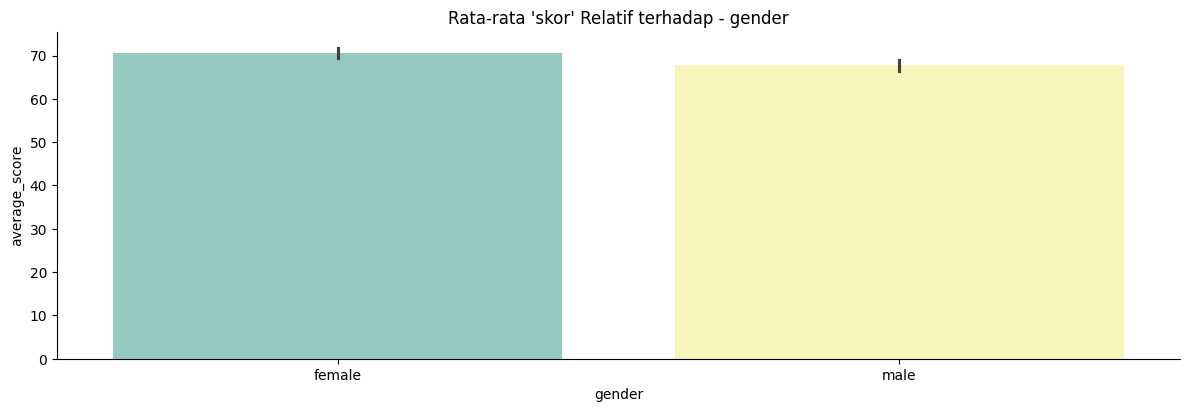

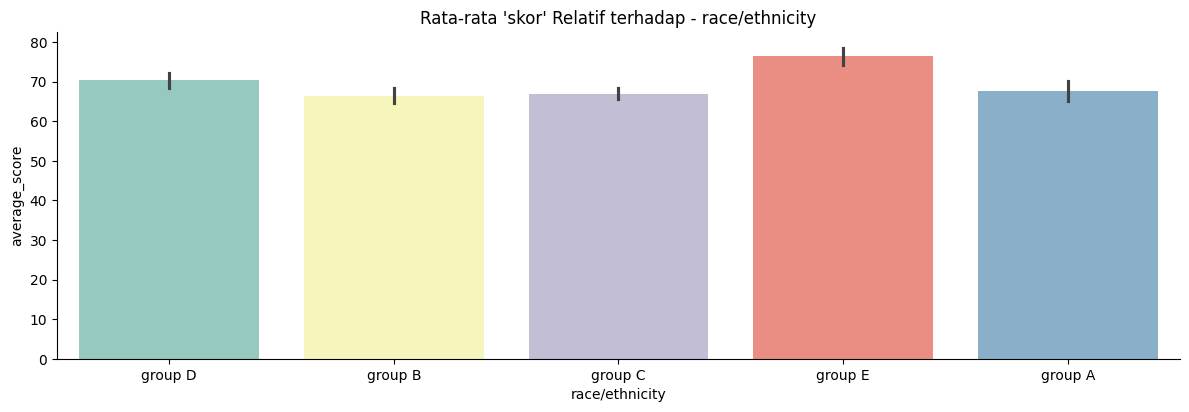

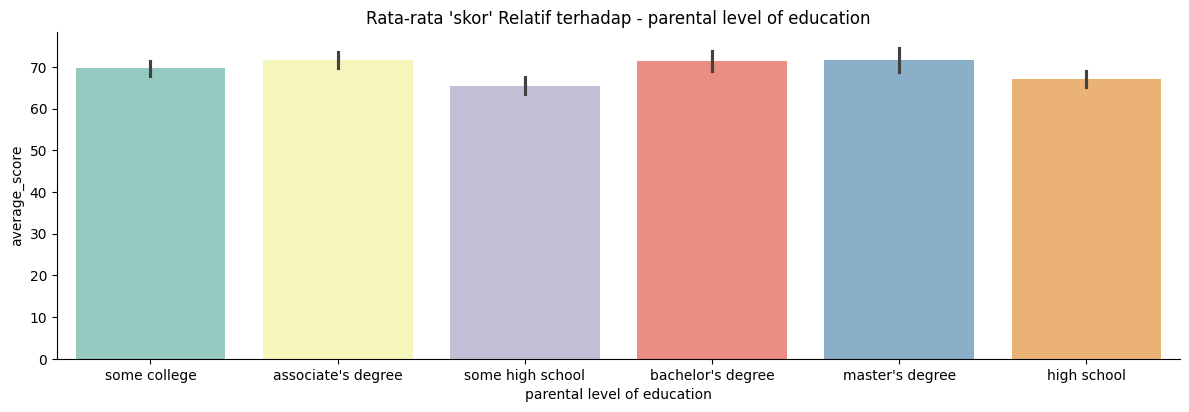

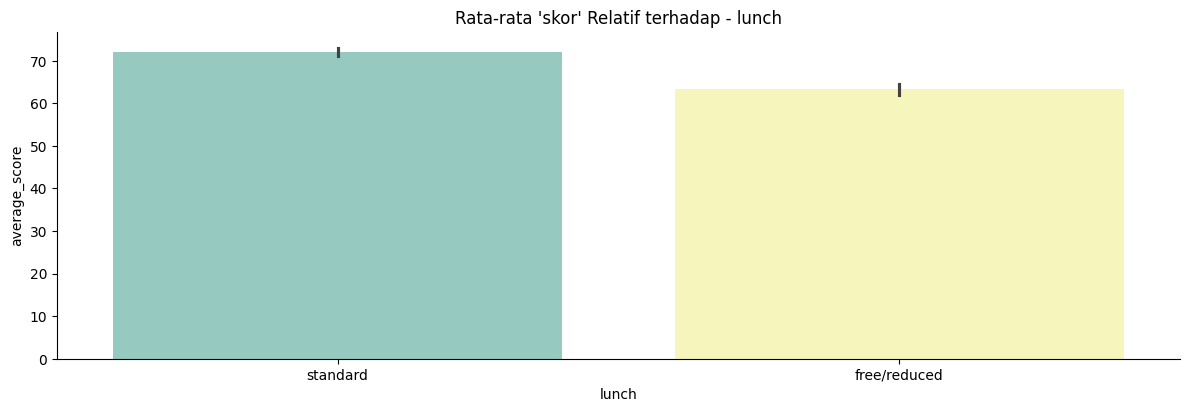

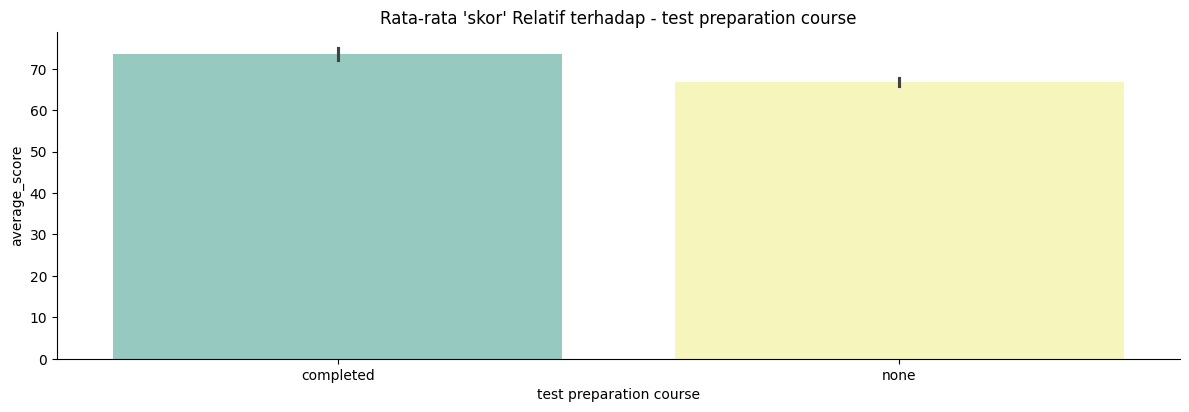

In [19]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="average_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'skor' Relatif terhadap - {}".format(col))

**Exploratory Data Analysis - Multivariate Analysis (Categorical terhadap target)**

Visualisasi

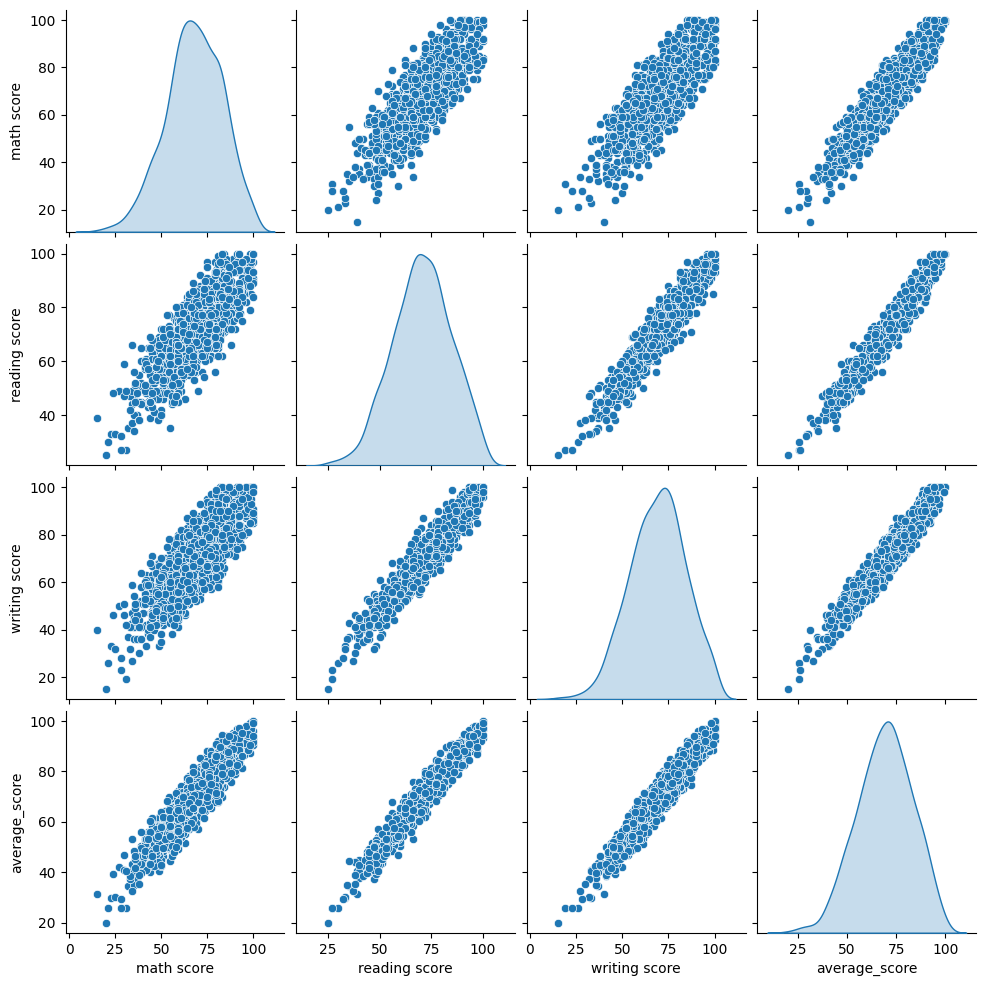

In [20]:
sns.pairplot(df, diag_kind= 'kde')

Matrix Korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

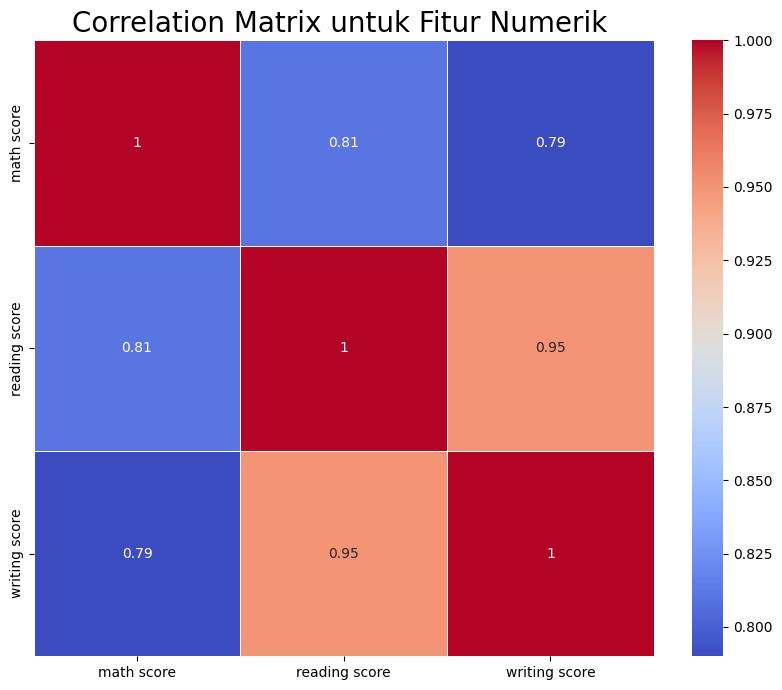

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

###Data Preparation

Feature engineering for target (y)

> Fitur telah ditambahkan pada saat proses EDA Multivariate



In [22]:
# df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3


In [23]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group D,some college,standard,completed,59,70,78,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,84.666667
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.000000
996,male,group C,some college,standard,none,80,66,66,70.666667
997,female,group A,high school,standard,completed,67,86,86,79.666667
998,male,group E,high school,standard,none,80,72,62,71.333333


Encoding Fitur Kategori

In [24]:
from sklearn.preprocessing import OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['gender'],prefix='gender')],axis=1)
df = pd.concat([df, pd.get_dummies(df['race/ethnicity'],prefix='race/ethnicity')],axis=1)
df = pd.concat([df, pd.get_dummies(df['parental level of education'],prefix='parental level of education')],axis=1)
df = pd.concat([df, pd.get_dummies(df['lunch'],prefix='lunch')],axis=1)
df = pd.concat([df, pd.get_dummies(df['test preparation course'],prefix='test preparation course')],axis=1)

df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1,inplace=True)
df.head()

,math score,reading score,writing score,average_score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,59,70,78,69.000000,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
1,96,93,87,92.000000,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True
2,57,76,77,70.000000,True,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True
3,70,70,63,67.666667,False,True,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
4,83,85,86,84.666667,True,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True


Reduksi Dimensi dengan PCA

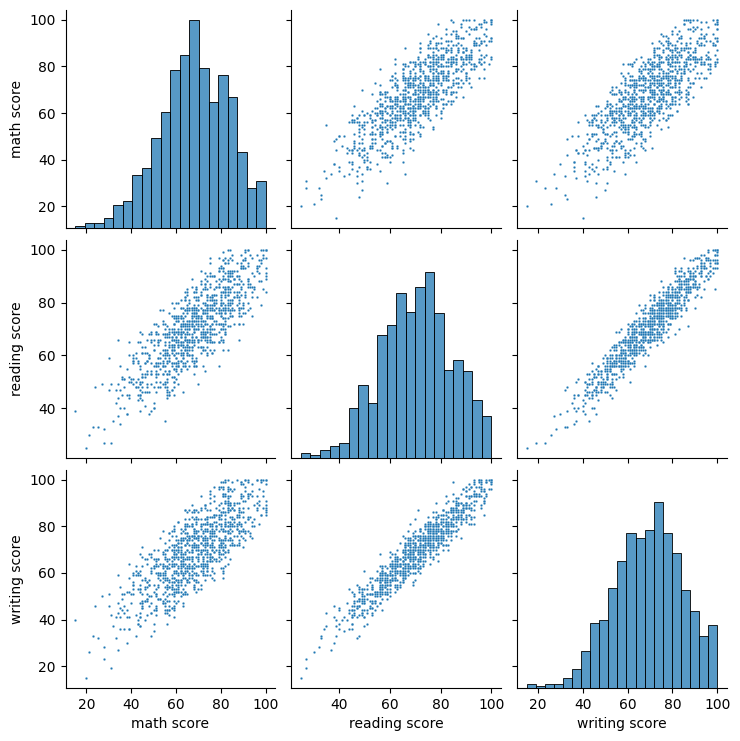

In [25]:
sns.pairplot(df[['math score','reading score','writing score']], plot_kws={"s": 3});

Hasil reduksi

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(df[['math score','reading score','writing score']])
princ_comp = pca.transform(df[['math score','reading score','writing score']])

In [27]:
pca.explained_variance_ratio_.round(3)

array([0.899, 0.085, 0.016])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['math score','reading score','writing score']])
df['student performance'] = pca.transform(df.loc[:, ('math score','reading score','writing score')]).flatten()
df.drop(['math score','reading score','writing score'], axis=1, inplace=True)

In [29]:
df

,average_score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,student performance
0,69.000000,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,-0.007568
1,92.000000,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,39.536769
2,70.000000,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,1.619101
3,67.666667,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,-2.608634
4,84.666667,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,26.974678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75.000000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,10.107275
996,70.666667,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,2.676583
997,79.666667,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,18.339884
998,71.333333,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,3.668081


**Train-Test-Split**

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(["average_score"],axis =1)
y = df["average_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [31]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 900
Total # of sample in test dataset: 100


**Standarisasi**

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['student performance']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,student performance
875,0.795069
933,-0.575787
861,0.552469
868,1.001751
792,-0.150796


In [33]:
X_train[numerical_features].describe().round(4)

,student performance
count,900.0000
mean,-0.0000
std,1.0006
min,-3.4809
25%,-0.6796
50%,0.0629
75%,0.7217
max,2.1829


###Model Development

Inisialisasi Model dan Evaluasi

In [34]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Model KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Model AdaBoostRegressor

In [37]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [38]:
 X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

###Evaluasi

Hitung Mean Squared Error masing-masing algoritma pada data train dan test

In [39]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.013706,0.011263
RF,0.000009,0.000008
Boosting,0.002364,0.002875


Visualisasi

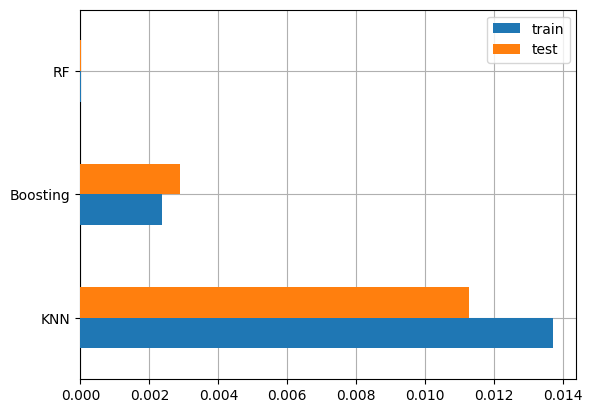

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Testing

In [41]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
131,56.333333,60.3,56.3,56.7
203,92.000000,87.2,92.0,93.2
50,72.000000,73.5,72.0,70.4
585,63.333333,67.8,63.3,63.8
138,60.666667,59.4,60.6,61.7
632,59.333333,59.8,59.3,58.6
328,61.333333,62.2,61.3,61.7
461,69.666667,70.2,69.8,70.3
924,58.333333,60.6,58.3,58.2
479,61.666667,65.5,61.7,62.5
